# Minicurso "Aventuras Matemáticas com a linguagem Julia"

# XXXVI SELMAT

<hr>

## Estrutura de decisão: 

- Avaliação condicional: if

```
if x < y
    ...
elseif x > y
    ...
else
    ...
end

```
<hr>

## Exercício 1:

Construa uma função computacional que decida se um dado número é positivo, negativo ou zero.

In [ ]:
x = -3

x = 6

if x % 2 == 0
    println(x," é par!")
elseif
    println("$x é ímpar!")
end


<hr>

## Estrutura de repetição:

- While

```
while critério
    ...
    i += 1
end

```

<hr>

## Exercício 2:

Construa uma figura fechada utlizando a estrutura de repetição <i> while </i>. Características: comprimento 10px e ângulo de $15^o$

In [ ]:
using Luxor

i = 1

@draw begin
    t = Turtle()
    Forward(t,10)
    Turn(t,15)
end

<hr>

## Estrutura de repetição:

- For

```
for i = 1:n
    ...
end

for i in []
    ...
end

```

<hr>

## Exercício 2:

Construa um pentágono, utlizando a estrutura de repetição <i> for </i>. Características: comprimento 100px.

<hr>

# Determinando zero (raiz) de função

## Método da bissecção

O <b>método da bisseção</b> explora o fato de que uma função contínua $f:[a, b]\to \mathbb{R}$ com $f(a)\cdot f(b) < 0$ possui um zero no intervalo $(a, b)$ (Teorema de Bolzano). 


Assim, a ideia para aproximar o zero de uma tal função $f(x)$ é tomar, como aproximação inicial, o ponto médio do intervalo $[a, b]$, isto é:

\begin{equation}
  x^{(0)} = \frac{(a + b)}{2}.
\end{equation}

Pode ocorrer de $f(x^{(0)}) = 0$ e, neste caso, o zero de $f(x)$ é $x^* = x^{(0)}$. 

Caso contrário, se $f(a)\cdot f(x^{(0)}) < 0$, então $x^*\in (a, x^{(0)})$. 


Neste caso, tomamos como nova aproximação do zero de $f(x)$ o ponto médio do intervalo $[a, x^{(0)}]$, isto é, $x^{(1)} = (a + x^{(0)})/2$. 

No outro caso, temos $f(x^{(0)})\cdot f(b) < 0$ e, então, tomamos $x^{(1)} = (x^{(0)} + b)/2$. 

De forma geral, cada iteração $i$ gera uma aproximação $x^{(i)}$ da seguinte forma:

\begin{equation}
  a^{(n)} = a,\quad b^{(n)} = b\quad\text{e}\quad x^{(n)} = \frac{a^{(n)} + b^{(n)}}{2}.
\end{equation}

Repete-se este procedimento até obtermos a aproximação desejada, de acordo com o critério de parada estabelecido.

[Método da bisseção.](https://github.com/Daniel-C-Fernandes/julia/metodo_da_bissecao.eps)

<hr>

# Exercício 3: Determinando zero (raiz) de função

A função $f(x)=x^3-3x^2+1$ possui três raízes reais, cada uma em um dos intervalos $[-1,0]$, $[0,2]$ e $[2,3]$, como pode ser verificado na figura a seguir. Determine uma aproximação para cada uma das raízes, utilizando o método da bissecção e a estrutura de repetição <i>for</i>. 

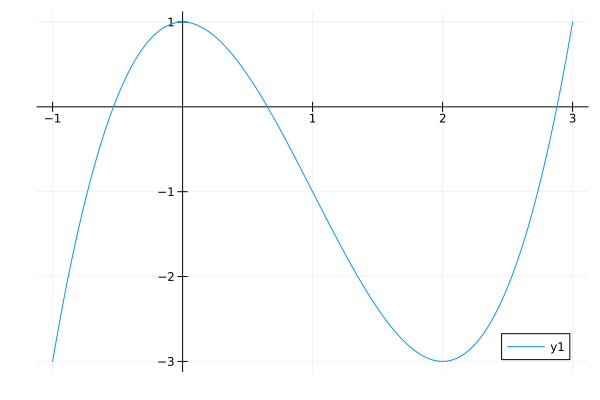

In [14]:
using Plots

f(x) = x^3-3x^2+1

plot(f, -1, 3, framestyle = :origin)

0

<hr>

# Resolvendo Sistemas Lineares

## Método iterativo de Jacobi para resolução de sistemas lineares

Dado um sistema linear $A{\bf x}=b$, os métodos iterativos fornecem uma aproximação para o vetor solução. Dado um vetor solução inicial ${\bf x}^0$, a ideia na construção dos métodos iterativos é de gerar uma sucessão de vetores ${\bf x}^k,\ k=1,2,...,$ que converge para a solução exata do sistema.

Os métodos iterativos para a resolução de sistemas lineares são métodos globais, ou seja, se o método converge, ele convergirá, qualquer que seja o vetor solução inicial $x^0$. A convergência desses métodos depende somente da matriz $A$. Detalhes sobre os critérios de convergência e sobre outros métodos iterativos podem ser encontrados, por exemplo, nos livros: <i> <u>Cálculo Numérico</u>, Neide Bertoldi Franco. <u>Cálculo numérico: aspectos teóricos e computacionais</u>, Marcia Riggiero e Vera L. R. Lopes. <u>Cálculo numérico</u>, Selma Arenales</i>.

<br>

<b> Considere o seguinte sistema linear: </b>

<br>

 $\begin{cases}
   10x_1 + 2x_2 +\ \ x_3=14 \\
  \ \ \  x_1 + 5x_2 + \ \ x_3=11 \\
  \ 2x_1 + 3x_2 +10x_3=\ 8 
\end{cases}$

Podemos reescrever o sistema acima de forma equilalente, dividindo cada equação pelo elemento da diagonal principal, explicitando $x_1$ na primeira equacao, $x_2$ na segunda equação e $x_3$ na terceira equacao.

$\begin{cases}
   x_1=\dfrac{14-2x_2-x_3}{10}\\
  x_2=\dfrac{11-x_1-x_3}{5} \\
  x_3=\dfrac{8-2x_1-3x_2}{10} 
\end{cases}$

<br>

Portanto, considerando uma solução inicial ${\bf x}^0=(x_1,x_2,x_3)^T$, podemos obter uma aproximação para a solução do sistema linear, pelo processo iterativo a seguir, fazendo $k = 1, 2, \dots$:

<br>

$\begin{cases}
  x_1^{(k+1)}=\dfrac{7}{5}-{\dfrac{x_2}{5}}^{(k)}-{\dfrac{x_3}{10}}^{(k)}\\
  x_2^{(k+1)}=\dfrac{11}{5}-{\dfrac{x_1}{5}}^{(k)}-{\dfrac{x_3}{5}}^{(k)}\\
  x_3^{(k+1)}=\dfrac{4}{5}-{\dfrac{x_1}{5}}^{(k)}-{\dfrac{3x_2}{10}}^{(k)}\\ 
\end{cases}$

<br><br>

Determine uma aproximação para a solução do sistema linear apresentado, utlizando-se o vetor inicial $x = (0\;\; 0\;\; 0)^T$ e 10 iterações (${\bf x}^{(10)}$):

In [31]:
# Vetor inicial
x = [0.0, 0.0, 0.0]

# m iterações
m = 10
for i = 1:m 
    # vetor auxiliar
    xk = [0.0, 0.0, 0.0]
    
    xk[1] = 7/5-x[2]/5-x[3]/10
    xk[2] = 11/5-x[1]/5-x[3]/5
    xk[3] = 4/5 - x[1]/5 -3*x[2]/10

    x = xk
end

println("Vetor x = $x")

Vetor x = [0.9999183775999998, 1.9998964624000002, -0.0001185184000001005]


<hr>

# Exercício 4:

Pesquise sobre o método iterativo de Gauss-Seidel. A seguir, implemente o método e resolva o sistema acima, comparando a solução aproximada obtida com a solução fornecida pelo método de Jacobi.

<hr>

# Exercício 5: Problema de dimensionamento de lotes:

Certa indústria de móveis, que fabrica um determinado tipo de guarda-roupa, deseja fazer um planejamento da produção para um horizonte de quatro dias. Sabe-se que a demanda para os próximos quatro dias são de 46, 174, 104 e 112 unidades, respectivamente. A fábrica possui um armazém onde é possível estocar a produção excedente a um custo de 2 unidades monetárias, por unidade por dia. O custo de produção de cada guarda roupa é 1 u.m. Considere que a capacidade de produção seja de 150 unidades por dia. O gerente de produção deseja definir quantos quarda-roupas produzir a cada dia de forma a atender a demanda com o menor custo possível.

Modelagem matemática do problema:

Variáveis de decisão:

$x_t$ : quantidade produzida de guarda-roupas no dia $t,\ \ t=1,2,3,4$.

$I_t$ : quantidade estocada de guarda-roupas no final do dia $t,\ \ t=1,2,3,4$.

\begin{equation}
\text{Minimizar  }x_1+x_2+x_3+x_4+2I_1+2I_2+2I_3+2I_4
\end{equation}


\begin{equation}
\text{ sujeito\  a}

\begin{cases}
x_1 + I_0=d_1+I_1\\
x_2 + I_1=d_2+I_2\\
x_3 + I_2=d_3+I_3\\
x_4 + I_3=d_4+I_4\\
0\leq x_1\leq 150\\
0\leq x_2\leq 150\\
0\leq x_3\leq 150\\
0\leq x_4\leq 150\\
\end{cases}
\end{equation}

<hr>

In [94]:
# Importar os pacotes necessário para otimização
using HiGHS, JuMP

# Configurar as variáveis
modelo = Model(HiGHS.Optimizer)
@variable(modelo, 0 <= x[1:4] <= 150, Int)
@variable(modelo, I[1:4] >= 0, Int)

# Estabelecer a função objetivo
@objective(modelo, Min, sum(x)+2sum(I[1:4]))

# Demandas
d = [46,174,104,112]

# Restrições
@constraint(modelo, r1, x[1] == d[1]+I[1])
@constraint(modelo, r[t=2:4], x[t]+I[t-1] == d[t]+I[t])


# Mostrar o modelo carregado
println(modelo, "\n")

# Otimizar o modelo
optimize!(modelo)

Min x[1] + x[2] + x[3] + x[4] + 2 I[1] + 2 I[2] + 2 I[3] + 2 I[4]
Subject to
 r1 : x[1] - I[1] = 46
 r[2] : x[2] + I[1] - I[2] = 174
 r[3] : x[3] + I[2] - I[3] = 104
 r[4] : x[4] + I[3] - I[4] = 112
 x[1] ≥ 0
 x[2] ≥ 0
 x[3] ≥ 0
 x[4] ≥ 0
 I[1] ≥ 0
 I[2] ≥ 0
 I[3] ≥ 0
 I[4] ≥ 0
 x[1] ≤ 150
 x[2] ≤ 150
 x[3] ≤ 150
 x[4] ≤ 150
 x[1] integer
 x[2] integer
 x[3] integer
 x[4] integer
 I[1] integer
 I[2] integer
 I[3] integer
 I[4] integer


Running HiGHS 1.7.2 (git hash: 5ce7a2753): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 1e+00]
  Cost   [1e+00, 2e+00]
  Bound  [2e+02, 2e+02]
  RHS    [5e+01, 2e+02]
Presolving model
3 rows, 7 cols, 9 nonzeros  0s
2 rows, 5 cols, 6 nonzeros  0s
2 rows, 5 cols, 6 nonzeros  0s
Objective function is integral with scale 1

Solving MIP model with:
   2 rows
   5 cols (0 binary, 5 integer, 0 implied int., 0 continuous)
   6 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dy

In [97]:
# Imprimir a solução ótima (valores ótimos das variáveis de decisão)
println("Variáveis de produção:")
for i = 1:4
    println(x[i], " = ", value(x[i]))
end

# Pular uma linha
println("\n")

println("Variáveis de estoque:")
println("I[0] = 0")
for i = 1:4
    println(I[i], " = ", value(I[i]))
end

println("\n")

# Imprimir o valor ótimo da função objetivo:
print("f(x[1], ..., x[4], I[1], I[4]) = ", objective_value(modelo))

Variáveis de produção:


x[1] = 70.0
x[2] = 150.0
x[3] = 104.0
x[4] = 112.0


Variáveis de estoque:
I[0] = 0
I[1] = 24.0
I[2] = 0.0
I[3] = 0.0
I[4] = 0.0


f(x[1], ..., x[4], I[1], I[4]) = 484.0

<hr>

# Exercício 6: Problema de transporte

Uma empresa fabrica um determinado produto em três cidades, Araraquara, Bauru e Caconde; o produto destina-se a quatro centros de consumo, sendo Adamantina, Barbacena, Caieiras e Dracena. Os custos estimados de transportar o produto das fábricas para os centros consumidores, assim como a demanda de cada centro e a oferta de cada fábrica são dados na tabela a seguir:

| Origem | Adamantina | Barbacena | Caieiras | Dracena | Oferta |
| ------------- | ------------- | ------------- | ------------- | ------------- | ------------- |
| Araraquara | 10 | 7 | 6 | 5 | 9 |
| Bauru | 2 | 8 | 9 | 1 | 10 |
| Caconde | 11 | 12 | 8 | 4 | 8 |
| Demanda | 7 | 6 | 10 | 4 | |


Determine o planejamento de transporte ótimo, visando atender as demandas dos centros consumidores à custo mínimo.

<img title="" src="https://raw.githubusercontent.com/Daniel-C-Fernandes/PO-2-bimestre/main/img/ex2.1n.png" alt="" style="zoom:15%; align: center"><br/><br>

<img title="" src="https://raw.githubusercontent.com/Daniel-C-Fernandes/PO-2-bimestre/main/img/ex2.2n.png" alt="" style="zoom:15%; align: center"><br/><br>

<img title="" src="https://raw.githubusercontent.com/Daniel-C-Fernandes/PO-2-bimestre/main/img/ex2.3n.png" alt="" style="zoom:15%; align: center">

### Função objetivo:

\begin{equation} 
    \begin{matrix} 
      \text{Minimizar }z =   & 10x_{11} & +7x_{12} &+6x_{13} &+5x_{14}&+\\
        & 2x_{21} &+8x_{22} &+9x_{23} &+x_{24}&+\\
        & 11x_{31} &+12x_{32} &+8x_{33} &+4x_{34}&\\
    \end{matrix}
\end{equation}

### Restrições:

\begin{equation}
    \text{s.a.}\left \{
        \begin{matrix}
            \text{ Limitação da oferta:} &&\\
            x_{11}+x_{12}+x_{13}+x_{14} & \leq & 9\\
            x_{21}+x_{22}+x_{23}+x_{24} & \leq & 10\\
            x_{31}+x_{32}+x_{33}+x_{34} & \leq & 8\\
            \text{ As demandas devem ser satisfeitas:}&&\\
            x_{11}+x_{21}+x_{31} &=& 7\\
            x_{12}+x_{22}+x_{32} &=& 6\\
            x_{13}+x_{23}+x_{33} &=& 10\\
            x_{14}+x_{24}+x_{34} &=& 4\\
            \text{ Condição de não negatividade:}&&\\
            x_{ij}\geq 0,\;i=1,2,3;\;j=1,2,3,4\\
        \end{matrix}
        \right .
\end{equation}

<hr>

In [84]:
# Importar os pacotes necessário para otimização
using HiGHS, JuMP

# Configurar as variáveis
modelo = Model(HiGHS.Optimizer)
@variable(modelo, x[i=1:3, j=1:4] >= 0, Int)

# Coeficientes da função objetivo
c = [
    10 7 6 5;
    2 8 9 1;
    11 12 8 4
]

# Estabelecer a função objetivo
@objective(modelo, Min, sum(c.*x))

# Parâmetros das restrições:

oferta = [9,10,8]
demanda = [7,6,10,4]

# Restrições de oferta
@constraint(modelo, r_oferta[i=1:3], sum(x[i,:]) <= oferta[i])

# Restrições de demanda
@constraint(modelo, r_demanda[j=1:4], sum(x[:,j]) == demanda[j])

# Mostrar o modelo carregado
println(modelo, "\n")

# Otimizar o model
optimize!(modelo)

Min 10 x[1,1] + 2 x[2,1] + 11 x[3,1] + 7 x[1,2] + 8 x[2,2] + 12 x[3,2] + 6 x[1,3] + 9 x[2,3] + 8 x[3,3] + 5 x[1,4] + x[2,4] + 4 x[3,4]
Subject to
 r_demanda[1] : x[1,1] + x[2,1] + x[3,1] = 7
 r_demanda[2] : x[1,2] + x[2,2] + x[3,2] = 6
 r_demanda[3] : x[1,3] + x[2,3] + x[3,3] = 10
 r_demanda[4] : x[1,4] + x[2,4] + x[3,4] = 4
 r_oferta[1] : x[1,1] + x[1,2] + x[1,3] + x[1,4] ≤ 9
 r_oferta[2] : x[2,1] + x[2,2] + x[2,3] + x[2,4] ≤ 10
 r_oferta[3] : x[3,1] + x[3,2] + x[3,3] + x[3,4] ≤ 8
 x[1,1] ≥ 0
 x[2,1] ≥ 0
 x[3,1] ≥ 0
 x[1,2] ≥ 0
 x[2,2] ≥ 0
 x[3,2] ≥ 0
 x[1,3] ≥ 0
 x[2,3] ≥ 0
 x[3,3] ≥ 0
 x[1,4] ≥ 0
 x[2,4] ≥ 0
 x[3,4] ≥ 0
 x[1,1] integer
 x[2,1] integer
 x[3,1] integer
 x[1,2] integer
 x[2,2] integer
 x[3,2] integer
 x[1,3] integer
 x[2,3] integer
 x[3,3] integer
 x[1,4] integer
 x[2,4] integer
 x[3,4] integer


Running HiGHS 1.7.2 (git hash: 5ce7a2753): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 1e+00]
  Cost   [1e+00, 1e+01]
  Bound  [0e+00

In [85]:
# Imprimir a solução ótima (valores ótimos das variáveis de decisão)
for i = 1:3, j=1:4
    println(x[i,j], " = ", value(x[i,j]))
end

# Pular uma linha
println("\n")

# Imprimir o valor ótimo da função objetivo:
print("f(x[1,1], ..., x[3,4]) = ", objective_value(modelo))

x[1,1] = 0.0
x[1,2] = 6.0
x[1,3] = 3.0
x[1,4] = 0.0
x[2,1] = 7.0
x[2,2] = 0.0
x[2,3] = 0.0
x[2,4] = 3.0
x[3,1] = 0.0
x[3,2] = 0.0
x[3,3] = 7.0
x[3,4] = 1.0


f(x[1,1], ..., x[3,4]) = 137.0